In [4]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle, datetime
import pandas as pd
import hydracv.utils.utils as utils

from analyzer import Analyzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# PATHNAME = ["/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
#             "/home/hengji/Documents/hydra/videos/EGCaMP_ctrl_30mins_40x_10fps_mv1.avi",
#             "/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a2_25x10fps_30mins.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi", 
#             "/home/hengji/Documents/hydra/videos/Pre_Bisect_40x_4fps_ex4.avi",
#             "/home/hengji/Documents/hydra/videos/Copy of NGCaMP6_50X_20fps_M1.avi",
#             "/home/hengji/Documents/hydra/videos/EGCaMP_ctrl_30mins_20x_10fps_mv1.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_40x_10fps_mv1.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_30-40x_10fps_mv5.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv4.avi"]
# PATHNAME = ["d:/hydracv/hydracv/data/videos/NGCaMP/Pre_Bisect_40x_4fps_ex4.avi"]
PATHNAME = ["/home/hengji/Documents/hydracv/hydracv/data/videos/NGCaMP/Pre_Bisect_40x_4fps_ex3.avi"]
# FPS = [10, 10, 10, 10, 10, 4, 20, 10, 10, 10, 10]
FPS = [4]

In [30]:
# Create an analyzer
anlzr = Analyzer()

# Or... Import a saved one
# anlzr = pickle.load(open("./objects/2020-04-01-23-35.txt", "rb"))

In [31]:
# Add video to the analyzer
# PATHNAME = ["/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi"]
# FPS = [10]
anlzr.add_videos(pathname=PATHNAME, fps=FPS)

In [32]:
# Check the added videos
anlzr.videos()

Pre_Bisect_40x_4fps_ex3.avi


In [13]:
# anlzr.find_midline(name="EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi")

In [ ]:
anlzr.plot_midline_len()

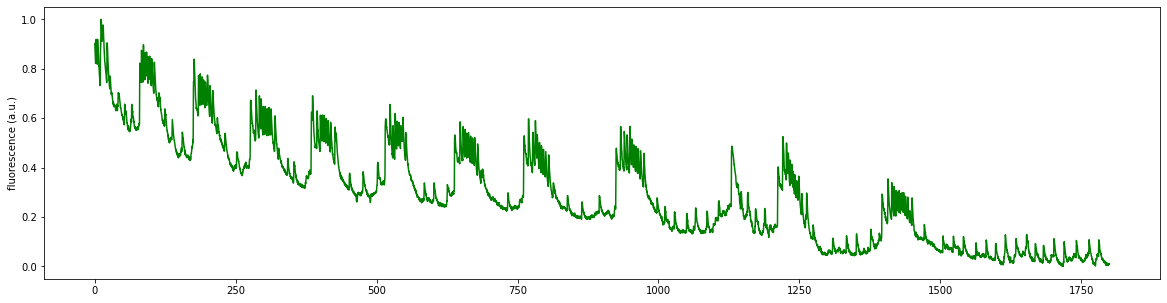

In [33]:
# Trace the fluorescences
anlzr.trace_fluos(normalized=True, 
                  display=False, 
                  plot=True)

In [ ]:
# Delete video
# anlzr.delete_video("Copy of NGCaMP6_50X_20fps_M1.avi")
# anlzr.delete_video("EGCaMP_ctrl_30mins_20x_10fps_mv1.avi")
# anlzr.delete_video("EndoRCaMP_ctrl_30mins_40x_10fps_mv1.avi")
# anlzr.delete_video("EndoRCaMP_ctrl_30mins_30-40x_10fps_mv5.avi")
# anlzr.delete_video("EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv4.avi")
# anlzr.videos()

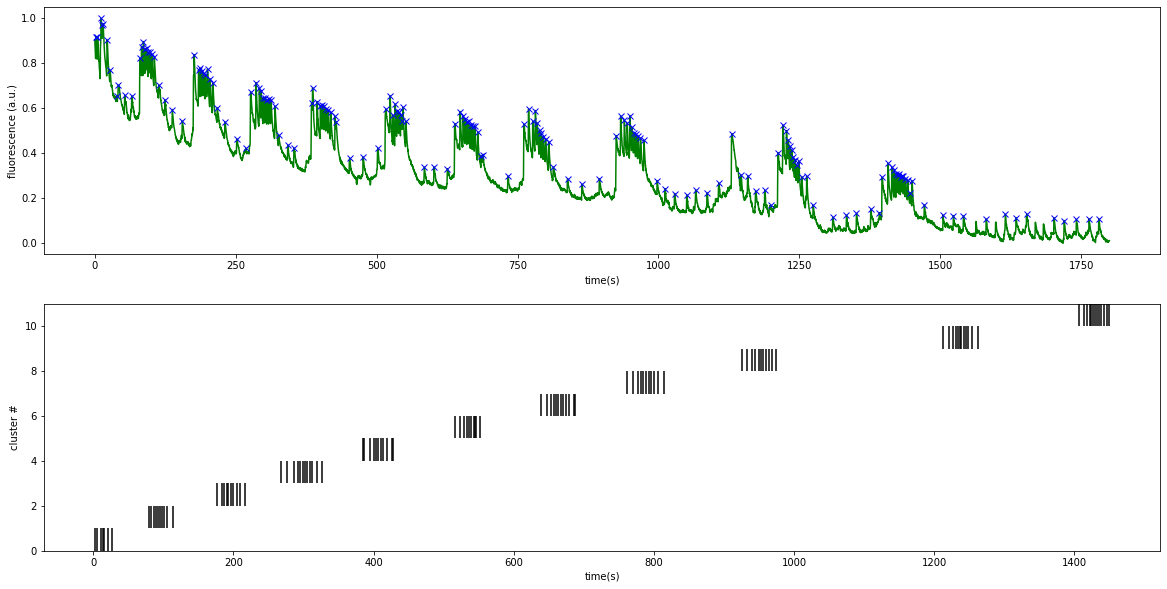

In [34]:
# Find peaks
anlzr.find_peaks(plot=True,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10,
                realign=False)

In [ ]:
# Find peaks of a specific video
anlzr.find_peaks(name="Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
                plot=True,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

In [37]:
anlzr._videos["Pre_Bisect_40x_4fps_ex3.avi"].peak_clusters()

[[9, 19, 45, 53, 59, 87, 108],
 [320, 332, 345, 358, 367, 380, 390, 404, 422, 456],
 [705, 736, 748, 761, 772, 784, 800, 818, 837, 869],
 [1071, 1106, 1144, 1168, 1180, 1195, 1209, 1222, 1236, 1250, 1279, 1304],
 [1538, 1545, 1577, 1601, 1615, 1627, 1641, 1656, 1674, 1705, 1713],
 [2065, 2095, 2116, 2131, 2145, 2158, 2171, 2179, 2186, 2207],
 [2555, 2592, 2613, 2628, 2641, 2653, 2667, 2681, 2696, 2717, 2742, 2752],
 [3047, 3078, 3108, 3126, 3139, 3156, 3169, 3184, 3200, 3221, 3255],
 [3701, 3732, 3757, 3777, 3797, 3811, 3824, 3840, 3854, 3872, 3896],
 [4849, 4883, 4908, 4921, 4934, 4947, 4955, 4967, 4981, 4995, 5017, 5051],
 [5628,
  5655,
  5672,
  5686,
  5697,
  5708,
  5719,
  5728,
  5739,
  5752,
  5768,
  5784,
  5799]]

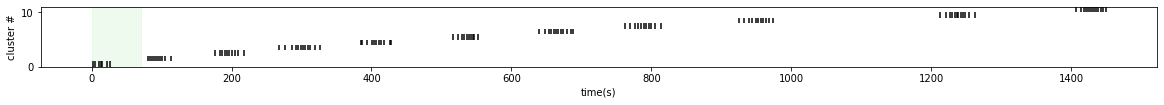

In [38]:
# Plot all spike trains
anlzr.plot_spike_trains()

In [75]:
# cluster1 = anlzr._videos['Pre_Bisect_40x_4fps_ex4.avi'].peak_clusters()
# cluster2 = anlzr._videos['Control-EGCaMP_exp1_a2_25x10fps_30mins.avi'].peak_clusters()

# def myflatten(seq):
#     ans = []
#     for x in seq:
#         ans.extend(x)
#     return ans

# cluster1 = myflatten(cluster1)
# cluster2 = myflatten(cluster2)

# cluster1 = [x/4 for x in cluster1 if x != 0]
# cluster2 = [x/10 for x in cluster2 if x != 0]

# fig = plt.figure(figsize=(20,5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# ax1.hist(cluster1, bins=40, edgecolor='k', color='b')
# ax2.hist(cluster2, bins=40, edgecolor='k', color='r')
# plt.show()

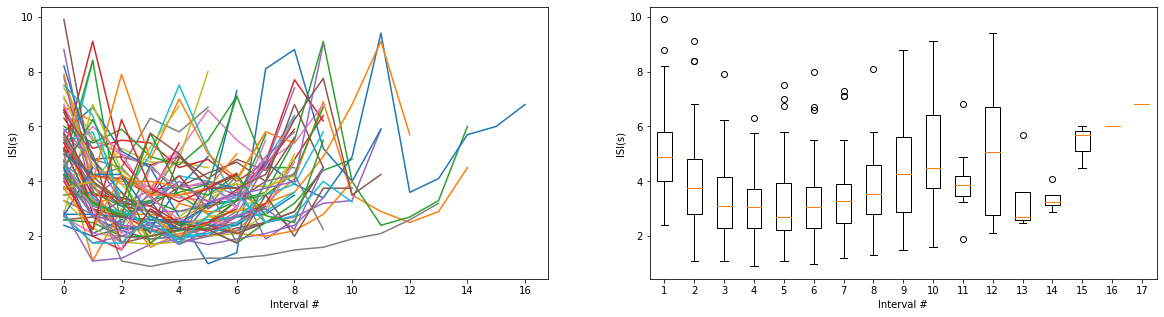

In [16]:
# Plot the statistics of ISI
anlzr.stat_isi()

In [ ]:
# Save anlzr
filename = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
filehandler = open("./data/objects/" + filename + ".txt", 'wb') 
pickle.dump(anlzr, filehandler)

In [7]:
fluo = pd.read_csv('./data/fluorescence/total_fluo_Pre_Bisect_40x_4fps_ex3.csv').values

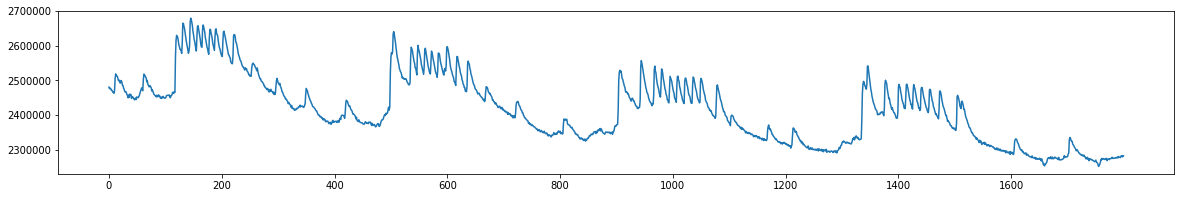

In [20]:
plt.figure(figsize=(20,3))
seq = fluo[200:2000]
plt.plot(seq)
plt.xticks(range(0, len(seq), 200))
plt.show()

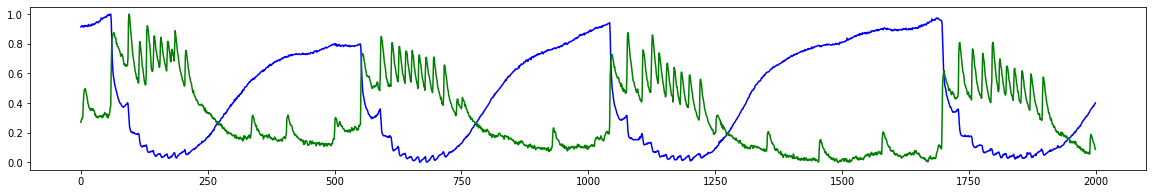

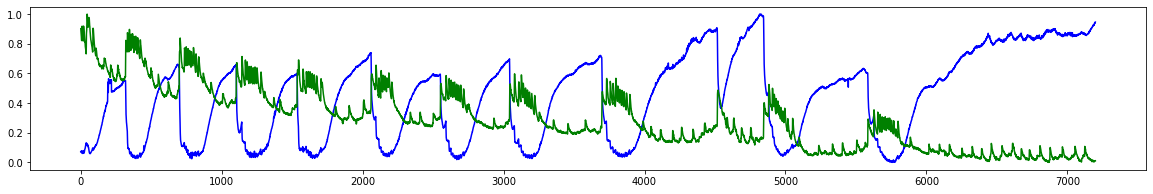

In [7]:
fluo = pd.read_csv('./data/fluorescence/total_fluo_Pre_Bisect_40x_4fps_ex3.csv').values
lengths = pd.read_csv('./data/length/lengths_Pre_Bisect_40x_4fps_ex3.csv').values
plt.figure(figsize=(20,3))
plt.plot(utils.normalize(lengths[2000:4000]), 'b')
plt.plot(utils.normalize(fluo[2000:4000]), 'g')
plt.show()

plt.figure(figsize=(20,3))
plt.plot(utils.normalize(utils.filter_abnormal(lengths[:])), 'b')
plt.plot(utils.normalize(fluo[:]), 'g')
plt.show()